In [97]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import requests
import json
from pprint import pprint

import scipy.stats as stats
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


#from census import Census

#Need api file



In [55]:
# import housing file
US_housing_file = "Housing Prices for US.csv"
US_housing_data = pd.read_csv(US_housing_file)
US_housing_data.head()

,DATE,MSPUS
0,1/1/1963,17800
1,4/1/1963,18000
2,7/1/1963,17900
3,10/1/1963,18500
4,1/1/1964,18500


In [10]:
US_housing= US_housing_data.rename(columns={"MSPUS":"Avg Home Price","DATE":"Date (Quarterly)"})
US_housing.head()

,Date (Quarterly),Avg Home Price
0,1/1/1963,17800
1,4/1/1963,18000
2,7/1/1963,17900
3,10/1/1963,18500
4,1/1/1964,18500


<function matplotlib.pyplot.show(*args, **kw)>

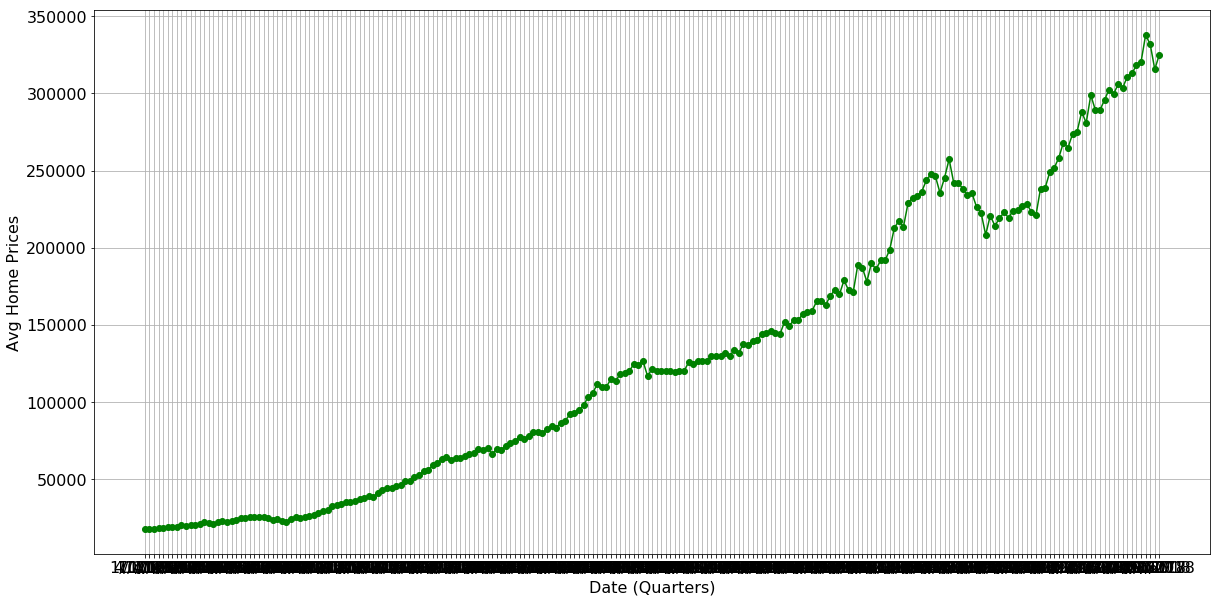

In [11]:
# plot graph of housing prices

plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date (Quarters)")
ax1.set_ylabel("Avg Home Prices")

data1 = US_housing["Avg Home Price"]
x_axis1 = US_housing["Date (Quarterly)"]

cost_trend = plt.plot(x_axis1,data1,color='g',marker = "o")

ax1.grid(True)
plt.show



In [12]:
#Import data from FRED

# https://api.stlouisfed.org/fred/series/observations?series_id=GNPCA&api_key=abcdefghijklmnopqrstuvwxyz123456
FRED_url = "https://api.stlouisfed.org/fred/series/observations?series_id="

housing_US_seriesid = "MSPUS"
housing_south_seriesid = "ASPS"
housing_west_seriesid = "ASPW"
housing_northeast_seriesid = "ASPNE"
housing_midwest_seriesid = "ASPMW"

fedfund_seriesid = "FEDFUNDS"

#set the data frequency (d=daily,w=weekly,m=monthly,a=annually)
frequency = "a"

# How will data be summarized (avg, sum, eop=end of period, default is avg)
aggregation = "avg"

api_key = "fd8c22bb4ce3ecd6d465947f86b42594"

query_url_housing = f'{FRED_url}{housing_US_seriesid}&api_key={api_key}&file_type=json'
query_url_south = f'{FRED_url}{housing_south_seriesid}&api_key={api_key}&file_type=json'
query_url_west = f'{FRED_url}{housing_west_seriesid}&api_key={api_key}&file_type=json'
query_url_northeast = f'{FRED_url}{housing_northeast_seriesid}&api_key={api_key}&file_type=json'
query_url_midwest = f'{FRED_url}{housing_midwest_seriesid}&api_key={api_key}&file_type=json'

In [13]:
US_housing_response = requests.get(query_url_housing).json()
pprint(US_housing_response)

ConnectionError: HTTPSConnectionPool(host='api.stlouisfed.org', port=443): Max retries exceeded with url: /fred/series/observations?series_id=MSPUS&api_key=fd8c22bb4ce3ecd6d465947f86b42594&file_type=json (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x1107a1f60>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known',))

In [15]:
US_housing_date=[]
US_housing_cost=[]

len(US_housing_response["observations"])

for observation in US_housing_response["observations"]:
    US_housing_date.append(observation["date"])
    US_housing_date_pd=pd.DataFrame(US_housing_date, columns=["Date"])
    US_housing_cost.append(observation["value"])
    US_housing_cost_pd=pd.DataFrame(US_housing_cost,columns=["Avg US Housing Cost"])

US_housing_df = pd.concat([US_housing_date_pd,US_housing_cost_pd], axis=1)
US_housing_df.head()

NameError: name 'US_housing_response' is not defined

In [16]:
# pull in region data 

south_housing_response = requests.get(query_url_south).json()
west_housing_response = requests.get(query_url_west).json()
northeast_housing_response = requests.get(query_url_northeast).json()
midwest_housing_response = requests.get(query_url_midwest).json()

ConnectionError: HTTPSConnectionPool(host='api.stlouisfed.org', port=443): Max retries exceeded with url: /fred/series/observations?series_id=ASPS&api_key=fd8c22bb4ce3ecd6d465947f86b42594&file_type=json (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x1a1a488b70>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known',))

In [17]:
# South DF
south_housing_date=[]
south_housing_cost=[]

for observation in south_housing_response["observations"]:
    south_housing_date.append(observation["date"])
    south_housing_date_pd=pd.DataFrame(south_housing_date, columns=["Date"])
    south_housing_cost.append(observation["value"])
    south_housing_cost_pd=pd.DataFrame(south_housing_cost,columns=["Avg South Region Housing Cost"])

south_housing_df = pd.concat([south_housing_date_pd,south_housing_cost_pd], axis=1)
south_housing_df.head()

NameError: name 'south_housing_response' is not defined

In [18]:
# South DF
west_housing_date=[]
west_housing_cost=[]

for observation in west_housing_response["observations"]:
    west_housing_date.append(observation["date"])
    west_housing_date_pd=pd.DataFrame(west_housing_date, columns=["Date"])
    west_housing_cost.append(observation["value"])
    west_housing_cost_pd=pd.DataFrame(west_housing_cost,columns=["Avg West Region Housing Cost"])

west_housing_df = pd.concat([west_housing_date_pd,west_housing_cost_pd], axis=1)
west_housing_df.head()

NameError: name 'west_housing_response' is not defined

In [19]:
# NE DF
ne_housing_date=[]
ne_housing_cost=[]

for observation in northeast_housing_response["observations"]:
    ne_housing_cost.append(observation["value"])
    ne_housing_cost_pd=pd.DataFrame(west_housing_cost,columns=["Avg NE Region Housing Cost"])

ne_housing_df = pd.concat([west_housing_date_pd,ne_housing_cost_pd], axis=1)
ne_housing_df.head()


NameError: name 'northeast_housing_response' is not defined

In [20]:
# MW DF
mw_housing_date=[]
mw_housing_cost=[]

for observation in midwest_housing_response["observations"]:
    mw_housing_cost.append(observation["value"])
    mw_housing_cost_pd=pd.DataFrame(mw_housing_cost,columns=["Avg MW Region Housing Cost"])

mw_housing_df = pd.concat([west_housing_date_pd,mw_housing_cost_pd], axis=1)
mw_housing_df.head()



NameError: name 'midwest_housing_response' is not defined

In [21]:
regional_housing = pd.concat([south_housing_date_pd,south_housing_cost_pd,west_housing_cost_pd,ne_housing_cost_pd,mw_housing_cost_pd],axis=1)
regional_housing

NameError: name 'south_housing_date_pd' is not defined

NameError: name 'regional_housing' is not defined

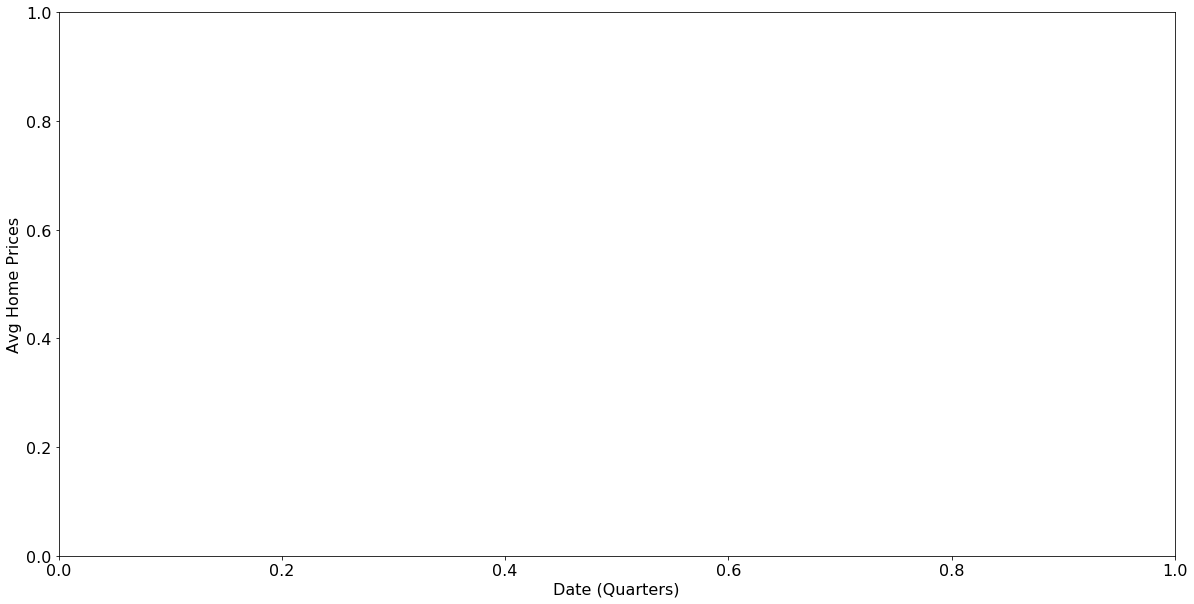

In [22]:
# plot graph of housing prices by region

fig2, ax2 = plt.subplots()

ax2.set_xlabel("Date (Quarters)")
ax2.set_ylabel("Avg Home Prices")

data_west = regional_housing["Avg West Region Housing Cost"]
data_south = regional_housing["Avg South Region Housing Cost"]
data_ne = regional_housing["Avg NE Region Housing Cost"]
data_mw = regional_housing["Avg MW Region Housing Cost"]

x_axis2 = regional_housing["Date"]

west_trend = plt.plot(x_axis2,data_west,color='g',marker = "o",label="West")
south_trend = plt.plot(x_axis2,data_south,color='r',marker = "o")
ne_trend = plt.plot(x_axis2,data_ne,color='b',marker = "o")
mw_trend = plt.plot(x_axis2,data_mw,color='c',marker = "o")

plt.show

In [23]:
# ANOVA between regions
# chi-squared test between regions



In [24]:
# call data from csv

# import housing file
regional_housing_file = "Housing prices by region.csv"
regional_housing_data = pd.read_csv(regional_housing_file)
regional_housing_data.head()

,DATE,ASPNE,ASPMW,ASPW,ASPS
0,1/1/1975,47300,41800,42300,38000
1,4/1/1975,46400,44000,43600,39800
2,7/1/1975,47400,42900,43600,39200
3,10/1/1975,47700,44500,47400,41300
4,1/1/1976,48600,45100,49200,43000


In [25]:
regional_housing= regional_housing_data.rename(columns={"DATE":"Date (Quarterly)","ASPS":"South","ASPW":"West","ASPNE":"Northeast","ASPMW":"Midwest"})
regional_housing.head()

,Date (Quarterly),Northeast,Midwest,West,South
0,1/1/1975,47300,41800,42300,38000
1,4/1/1975,46400,44000,43600,39800
2,7/1/1975,47400,42900,43600,39200
3,10/1/1975,47700,44500,47400,41300
4,1/1/1976,48600,45100,49200,43000


<function matplotlib.pyplot.show(*args, **kw)>

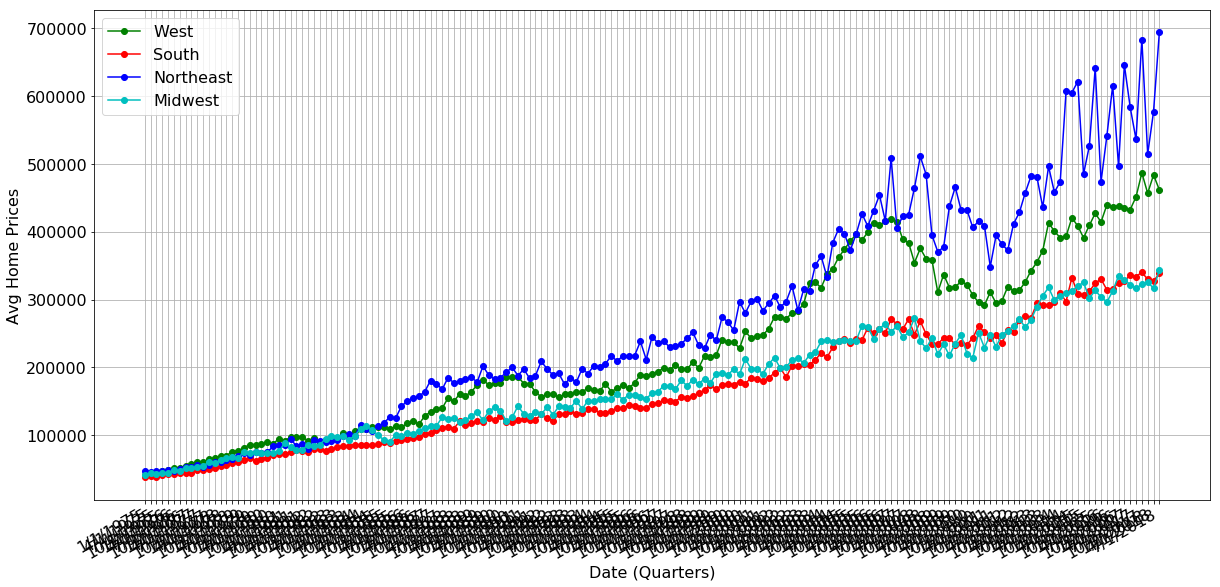

In [26]:
# plot graph of housing prices by region

plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig3, ax3 = plt.subplots()

ax3.set_xlabel("Date (Quarters)")
ax3.set_ylabel("Avg Home Prices")

data_west = regional_housing["West"]
data_south = regional_housing["South"]
data_ne = regional_housing["Northeast"]
data_mw = regional_housing["Midwest"]

x_axis3 = regional_housing["Date (Quarterly)"]

west_trend = plt.plot(x_axis3,data_west,color='g',marker = "o")
south_trend = plt.plot(x_axis3,data_south,color='r',marker = "o")
ne_trend = plt.plot(x_axis3,data_ne,color='b',marker = "o")
mw_trend = plt.plot(x_axis3,data_mw,color='c',marker = "o")

plt.legend(loc="best")

ax3.grid(True)
fig3.autofmt_xdate()
plt.show

In [27]:
# Perform the ANOVA
stats.f_oneway(regional_housing["West"], regional_housing["South"], regional_housing["Northeast"], regional_housing["Midwest"])

F_onewayResult(statistic=27.70093650654343, pvalue=6.249977134312744e-17)

In [28]:
regional_20yr = regional_housing.iloc[95:175,:]
regional_20yr.head()

regional_10yr = regional_housing.iloc[135:175,:]
regional_10yr.head()

,Date (Quarterly),Northeast,Midwest,West,South
135,10/1/2008,395100,243800,358400,234500
136,1/1/2009,370600,219600,311000,234500
137,4/1/2009,377300,234000,336900,243500
138,7/1/2009,437700,217700,317800,243800
139,10/1/2009,465800,235300,318800,232900


<function matplotlib.pyplot.show(*args, **kw)>

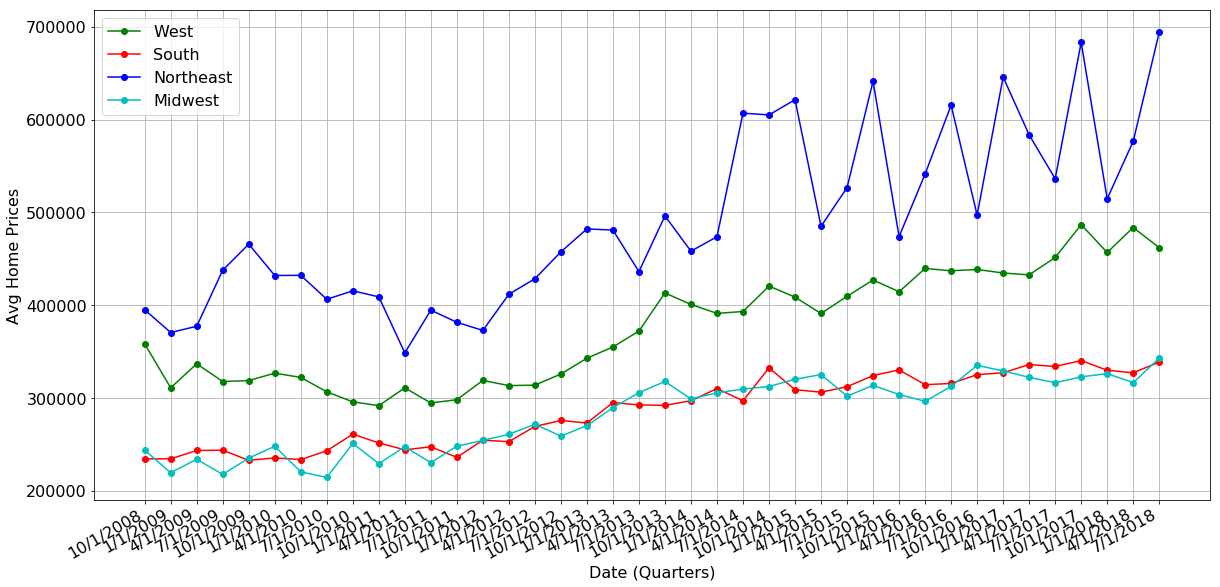

In [29]:
# plot graph of housing prices by region 10 Year

plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig4, ax4 = plt.subplots()

ax4.set_xlabel("Date (Quarters)")
ax4.set_ylabel("Avg Home Prices")

data_west = regional_10yr["West"]
data_south = regional_10yr["South"]
data_ne = regional_10yr["Northeast"]
data_mw = regional_10yr["Midwest"]

x_axis4 = regional_10yr["Date (Quarterly)"]

west_trend = plt.plot(x_axis4,data_west,color='g',marker = "o")
south_trend = plt.plot(x_axis4,data_south,color='r',marker = "o")
ne_trend = plt.plot(x_axis4,data_ne,color='b',marker = "o")
mw_trend = plt.plot(x_axis4,data_mw,color='c',marker = "o")

plt.legend(loc="best")

ax4.grid(True)
fig4.autofmt_xdate()
plt.show

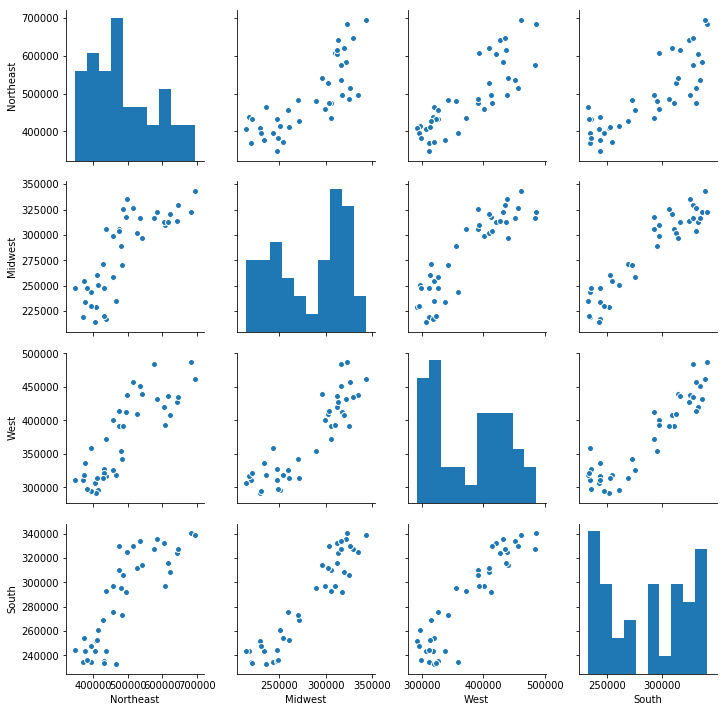

In [56]:
sns.pairplot(regional_10yr)

In [30]:
# Perform the ANOVA 10 Yr
stats.f_oneway(regional_10yr["West"], regional_10yr["South"], regional_10yr["Northeast"], regional_10yr["Midwest"])

F_onewayResult(statistic=99.03914548430888, pvalue=6.161046559808874e-36)

In [31]:
# Perform the ANOVA 10 Yr (minus NE)
stats.f_oneway(regional_10yr["West"], regional_10yr["South"], regional_10yr["Midwest"])

F_onewayResult(statistic=50.46478221336024, pvalue=1.5753537397448586e-16)

In [32]:
# Perform the ANOVA 10 Yr (minus NE)
stats.f_oneway(regional_10yr["South"], regional_10yr["Midwest"])

F_onewayResult(statistic=0.24973257798687726, pvalue=0.618670266735535)

In [38]:
# Create a boxplot to compare means
#regional_10yr.boxplot("mosq", by="treatment", figsize=(20, 10))


In [ ]:
# Chi-Square of Variance 10 Yr


In [ ]:
#-------------------------------------------------------------------------

In [34]:
regional_housing.head()

,Date (Quarterly),Northeast,Midwest,West,South
0,1/1/1975,47300,41800,42300,38000
1,4/1/1975,46400,44000,43600,39800
2,7/1/1975,47400,42900,43600,39200
3,10/1/1975,47700,44500,47400,41300
4,1/1/1976,48600,45100,49200,43000


In [35]:
# Normalize US Data 

#US_housing_v_unemployment["Avg Home Price Chg"] = US_housing_v_unemployment["Avg Home Price"].pct_change(periods=1, fill_method='pad', limit=None, freq=None)
#US_housing_v_unemployment["Unemployment Rate Chg"] = US_housing_v_unemployment["Unemployment Rate (%)"].pct_change(periods=1, fill_method='pad', limit=None, freq=None)

#mean_AHP = US_housing_v_unemployment["Avg Home Price Chg"].mean()
#mean_UER = US_housing_v_unemployment["Unemployment Rate Chg"].mean()

#US_housing_v_unemployment["Avg Home Price Chg (Norm)"] = US_housing_v_unemployment["Avg Home Price Chg"] - mean_AHP
#US_housing_v_unemployment["Unemployment Rate Chg (Norm)"] = US_housing_v_unemployment["Unemployment Rate Chg"] - mean_UER

#US_housing_v_unemployment.head()

In [59]:
# import fed funds rate
fed_funds_file=pd.read_csv("FedFundsRateQuarterly.csv")


fed_funds=fed_funds_file.rename(columns={"DATE":"Date","FEDFUNDS":"Fed Funds Rate"})
fed_funds.head()


,Date,Fed Funds Rate
0,1975-01-01,6.303333
1,1975-04-01,5.420000
2,1975-07-01,6.160000
3,1975-10-01,5.413333
4,1976-01-01,4.826667


In [60]:
fed_funds_regional = pd.concat([regional_housing, fed_funds], axis=1)
fed_funds_regional.head()

,Date (Quarterly),Northeast,Midwest,West,South,Date,Fed Funds Rate
0,1/1/1975,47300,41800,42300,38000,1975-01-01,6.303333
1,4/1/1975,46400,44000,43600,39800,1975-04-01,5.420000
2,7/1/1975,47400,42900,43600,39200,1975-07-01,6.160000
3,10/1/1975,47700,44500,47400,41300,1975-10-01,5.413333
4,1/1/1976,48600,45100,49200,43000,1976-01-01,4.826667


In [87]:
# Normalize the Regional Data

fed_funds_regional["NE Quarterly Change"]= fed_funds_regional["Northeast"].pct_change(periods=1,fill_method='pad',limit=None,freq=None)
fed_funds_regional["MW Quarterly Change"]= fed_funds_regional["Midwest"].pct_change(periods=1,fill_method='pad',limit=None,freq=None)
fed_funds_regional["W Quarterly Change"]= fed_funds_regional["West"].pct_change(periods=1,fill_method='pad',limit=None,freq=None)
fed_funds_regional["S Quarterly Change"]= fed_funds_regional["South"].pct_change(periods=1,fill_method='pad',limit=None,freq=None)
fed_funds_regional["Fed Funds Quarterly Change"]= fed_funds_regional["Fed Funds Rate"].pct_change(periods=1,fill_method='pad',limit=None,freq=None)

mean_NE = fed_funds_regional["NE Quarterly Change"].mean()
mean_MW = fed_funds_regional["MW Quarterly Change"].mean()
mean_W = fed_funds_regional["W Quarterly Change"].mean()
mean_S = fed_funds_regional["S Quarterly Change"].mean()
mean_Fed = fed_funds_regional["Fed Funds Quarterly Change"].mean()

fed_funds_regional["Avg NE Price Chg (Norm)"] = fed_funds_regional["NE Quarterly Change"] - mean_NE
fed_funds_regional["Avg MW Price Chg (Norm)"] = fed_funds_regional["MW Quarterly Change"] - mean_MW
fed_funds_regional["Avg W Price Chg (Norm)"] = fed_funds_regional["W Quarterly Change"] - mean_W
fed_funds_regional["Avg S Price Chg (Norm)"] = fed_funds_regional["S Quarterly Change"] - mean_S
fed_funds_regional["Avg Fed Funds Chg (Norm)"] = fed_funds_regional["Fed Funds Quarterly Change"] - mean_Fed

fed_funds_regional.head(200)

,Date (Quarterly),Northeast,Midwest,West,South,Date,Fed Funds Rate,NE Quarterly Change,MW Quarterly Change,W Quarterly Change,S Quarterly Change,Fed Funds Quarterly Change,Avg NE Price Chg (Norm),Avg MW Price Chg (Norm),Avg W Price Chg (Norm),Avg S Price Chg (Norm),Avg Fed Funds Chg (Norm)
1,4/1/1975,46400,44000,43600,39800,1975-04-01,5.420000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7/1/1975,47400,42900,43600,39200,1975-07-01,6.160000,0.021552,-0.025000,0.000000,-0.015075,0.136531,0.001773,-0.038521,-0.014681,-0.028165,0.122754
3,10/1/1975,47700,44500,47400,41300,1975-10-01,5.413333,0.006329,0.037296,0.087156,0.053571,-0.121212,-0.013450,0.023775,0.072475,0.040482,-0.134989
4,1/1/1976,48600,45100,49200,43000,1976-01-01,4.826667,0.018868,0.013483,0.037975,0.041162,-0.108374,-0.000911,-0.000038,0.023294,0.028073,-0.122151
5,4/1/1976,48100,49400,51600,43700,1976-04-01,5.196667,-0.010288,0.095344,0.048780,0.016279,0.076657,-0.030067,0.081823,0.034100,0.003190,0.062881
6,7/1/1976,50700,47800,52000,44200,1976-07-01,5.283333,0.054054,-0.032389,0.007752,0.011442,0.016677,0.034275,-0.045910,-0.006929,-0.001648,0.002900
7,10/1/1976,53100,52600,54900,44200,1976-10-01,4.873333,0.047337,0.100418,0.055769,0.000000,-0.077603,0.027558,0.086897,0.041089,-0.013089,-0.091379
8,1/1/1977,54000,51500,57900,45100,1977-01-01,4.660000,0.016949,-0.020913,0.054645,0.020362,-0.043776,-0.002830,-0.034434,0.039964,0.007273,-0.057553
9,4/1/1977,55800,54100,61200,48300,1977-04-01,5.156667,0.033333,0.050485,0.056995,0.070953,0.106581,0.013554,0.036964,0.042314,0.057864,0.092804
10,7/1/1977,52900,54800,60700,48300,1977-07-01,5.820000,-0.051971,0.012939,-0.008170,0.000000,0.128636,-0.071750,-0.000582,-0.022850,-0.013089,0.114859


In [88]:
# Remove first row
#fed_funds_regional = fed_funds_regional.iloc[1:175,:]
fed_funds_regional.head(200)

,Date (Quarterly),Northeast,Midwest,West,South,Date,Fed Funds Rate,NE Quarterly Change,MW Quarterly Change,W Quarterly Change,S Quarterly Change,Fed Funds Quarterly Change,Avg NE Price Chg (Norm),Avg MW Price Chg (Norm),Avg W Price Chg (Norm),Avg S Price Chg (Norm),Avg Fed Funds Chg (Norm)
2,7/1/1975,47400,42900,43600,39200,1975-07-01,6.160000,0.021552,-0.025000,0.000000,-0.015075,0.136531,0.001773,-0.038521,-0.014681,-0.028165,0.122754
3,10/1/1975,47700,44500,47400,41300,1975-10-01,5.413333,0.006329,0.037296,0.087156,0.053571,-0.121212,-0.013450,0.023775,0.072475,0.040482,-0.134989
4,1/1/1976,48600,45100,49200,43000,1976-01-01,4.826667,0.018868,0.013483,0.037975,0.041162,-0.108374,-0.000911,-0.000038,0.023294,0.028073,-0.122151
5,4/1/1976,48100,49400,51600,43700,1976-04-01,5.196667,-0.010288,0.095344,0.048780,0.016279,0.076657,-0.030067,0.081823,0.034100,0.003190,0.062881
6,7/1/1976,50700,47800,52000,44200,1976-07-01,5.283333,0.054054,-0.032389,0.007752,0.011442,0.016677,0.034275,-0.045910,-0.006929,-0.001648,0.002900
7,10/1/1976,53100,52600,54900,44200,1976-10-01,4.873333,0.047337,0.100418,0.055769,0.000000,-0.077603,0.027558,0.086897,0.041089,-0.013089,-0.091379
8,1/1/1977,54000,51500,57900,45100,1977-01-01,4.660000,0.016949,-0.020913,0.054645,0.020362,-0.043776,-0.002830,-0.034434,0.039964,0.007273,-0.057553
9,4/1/1977,55800,54100,61200,48300,1977-04-01,5.156667,0.033333,0.050485,0.056995,0.070953,0.106581,0.013554,0.036964,0.042314,0.057864,0.092804
10,7/1/1977,52900,54800,60700,48300,1977-07-01,5.820000,-0.051971,0.012939,-0.008170,0.000000,0.128636,-0.071750,-0.000582,-0.022850,-0.013089,0.114859
11,10/1/1977,55700,60900,65300,50400,1977-10-01,6.513333,0.052930,0.111314,0.075783,0.043478,0.119129,0.033151,0.097793,0.061102,0.030389,0.105353


In [63]:
fed_funds_regional["Avg W Price Chg (Norm)"]=pd.to_numeric(fed_funds_regional["Avg W Price Chg (Norm)"])

<function matplotlib.pyplot.show(*args, **kw)>

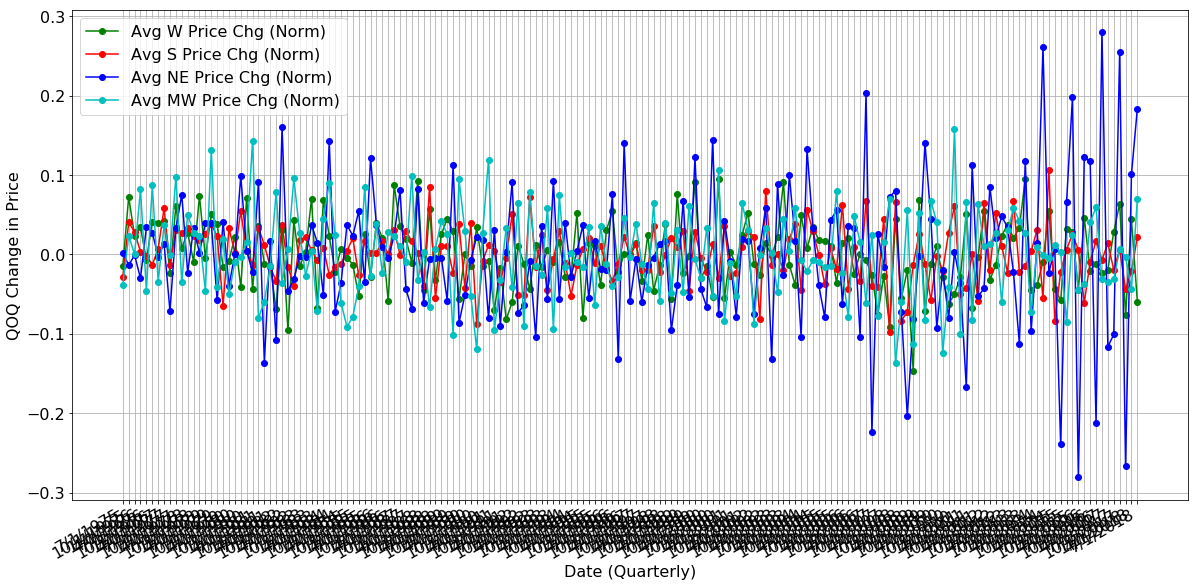

In [89]:
# plot graph of housing prices by region all years, QOQ changes against Fed Fund

plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig5, ax5 = plt.subplots()

ax5.set_xlabel("Date (Quarterly)")
ax5.set_ylabel("QOQ Change in Price")

data_ne2 = fed_funds_regional["Avg NE Price Chg (Norm)"]
data_mw2 = fed_funds_regional["Avg MW Price Chg (Norm)"]
data_w2 = fed_funds_regional["Avg W Price Chg (Norm)"]
data_s2 = fed_funds_regional["Avg S Price Chg (Norm)"]

x_axis5 = fed_funds_regional["Date (Quarterly)"]

west_trend2 = plt.plot(x_axis5,data_w2,color='g',marker = "o")
south_trend2 = plt.plot(x_axis5,data_s2,color='r',marker = "o")
ne_trend2 = plt.plot(x_axis5,data_ne2,color='b',marker = "o")
mw_trend2 = plt.plot(x_axis5,data_mw2,color='c',marker = "o")

plt.legend(loc="best")

ax5.grid(True)
fig5.autofmt_xdate()
plt.show

In [90]:
fed_funds_regional_delcol=fed_funds_regional.drop(columns=["Northeast","Midwest","South","West","Date","Fed Funds Rate","NE Quarterly Change","MW Quarterly Change","S Quarterly Change","W Quarterly Change","Fed Funds Quarterly Change"])
fed_funds_regional_delcol.head()


,Date (Quarterly),Avg NE Price Chg (Norm),Avg MW Price Chg (Norm),Avg W Price Chg (Norm),Avg S Price Chg (Norm),Avg Fed Funds Chg (Norm)
2,7/1/1975,0.001773,-0.038521,-0.014681,-0.028165,0.122754
3,10/1/1975,-0.013450,0.023775,0.072475,0.040482,-0.134989
4,1/1/1976,-0.000911,-0.000038,0.023294,0.028073,-0.122151
5,4/1/1976,-0.030067,0.081823,0.034100,0.003190,0.062881
6,7/1/1976,0.034275,-0.045910,-0.006929,-0.001648,0.002900


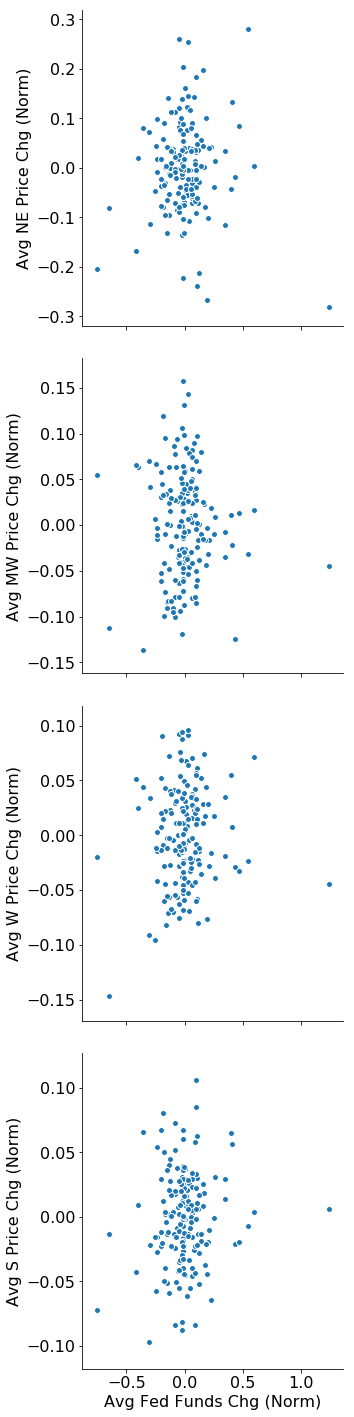

In [91]:
sns.pairplot(fed_funds_regional_delcol,x_vars=["Avg Fed Funds Chg (Norm)"],y_vars=["Avg NE Price Chg (Norm)","Avg MW Price Chg (Norm)","Avg W Price Chg (Norm)","Avg S Price Chg (Norm)"],size=5)

In [92]:
# Also do values for 10 year but have to calculate a new mean
regional_Fed_Funds_10yr = fed_funds_regional.iloc[134:174,:]
regional_Fed_Funds_10yr.head()


,Date (Quarterly),Northeast,Midwest,West,South,Date,Fed Funds Rate,NE Quarterly Change,MW Quarterly Change,W Quarterly Change,S Quarterly Change,Fed Funds Quarterly Change,Avg NE Price Chg (Norm),Avg MW Price Chg (Norm),Avg W Price Chg (Norm),Avg S Price Chg (Norm),Avg Fed Funds Chg (Norm)
136,1/1/2009,370600,219600,311000,234500,2009-01-01,0.183333,-0.062010,-0.099262,-0.132254,0.000000,-0.638158,-0.081789,-0.112783,-0.146935,-0.013089,-0.651935
137,4/1/2009,377300,234000,336900,243500,2009-04-01,0.180000,0.018079,0.065574,0.083280,0.038380,-0.018182,-0.001700,0.052053,0.068599,0.025290,-0.031959
138,7/1/2009,437700,217700,317800,243800,2009-07-01,0.156667,0.160085,-0.069658,-0.056693,0.001232,-0.129630,0.140306,-0.083179,-0.071374,-0.011857,-0.143407
139,10/1/2009,465800,235300,318800,232900,2009-10-01,0.120000,0.064199,0.080845,0.003147,-0.044709,-0.234043,0.044420,0.067324,-0.011534,-0.057798,-0.247819
140,1/1/2010,432000,248000,326800,235500,2010-01-01,0.133333,-0.072563,0.053974,0.025094,0.011164,0.111111,-0.092342,0.040452,0.010414,-0.001926,0.097334


<function matplotlib.pyplot.show(*args, **kw)>

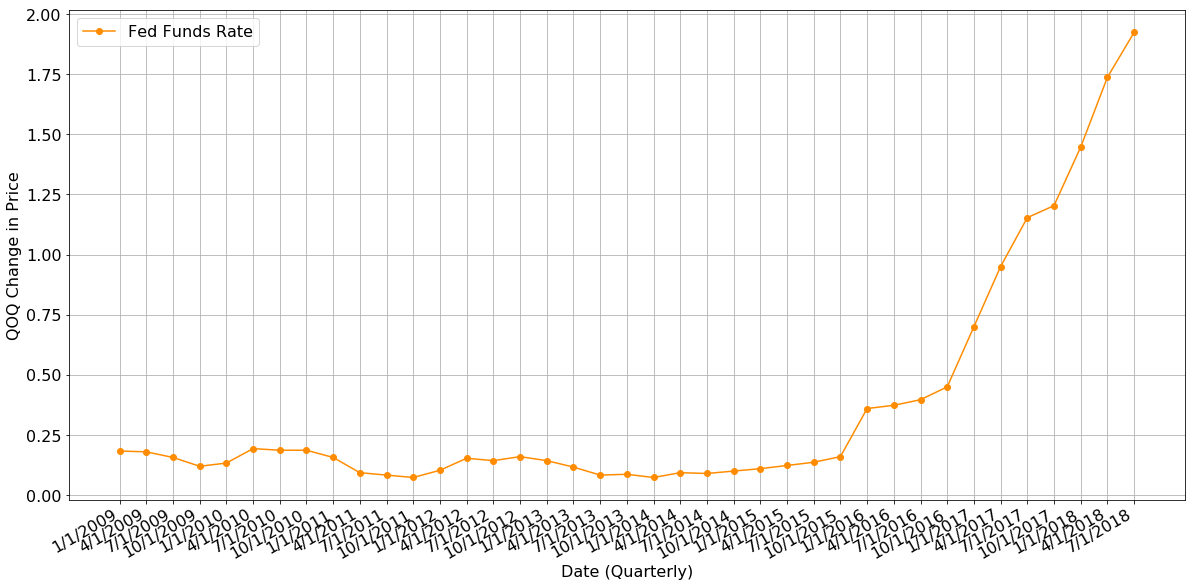

In [93]:
# plot graph of housing prices by region all years, Actuals against Fed Fund, 10 YR

plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig7, ax7 = plt.subplots()

ax7.set_xlabel("Date (Quarterly)")
ax7.set_ylabel("QOQ Change in Price")

#data_ne4 = regional_Fed_Funds_10yr["Northeast"]
#data_mw4 = regional_Fed_Funds_10yr["Midwest"]
#data_w4 = regional_Fed_Funds_10yr["West"]
#data_s4 = regional_Fed_Funds_10yr["South"]
data_fed4 = regional_Fed_Funds_10yr["Fed Funds Rate"]

x_axis7 = regional_Fed_Funds_10yr["Date (Quarterly)"]

#west_trend4 = plt.plot(x_axis7,data_w4,color='g',marker = "o")
#south_trend4 = plt.plot(x_axis7,data_s4,color='r',marker = "o")
#ne_trend4 = plt.plot(x_axis7,data_ne4,color='b',marker = "o")
#mw_trend4 = plt.plot(x_axis7,data_mw4,color='c',marker = "o")
fed_trend4 = plt.plot(x_axis7,data_fed4,color='darkorange',marker = "o")

plt.legend(loc="best")

ax7.grid(True)
fig7.autofmt_xdate()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

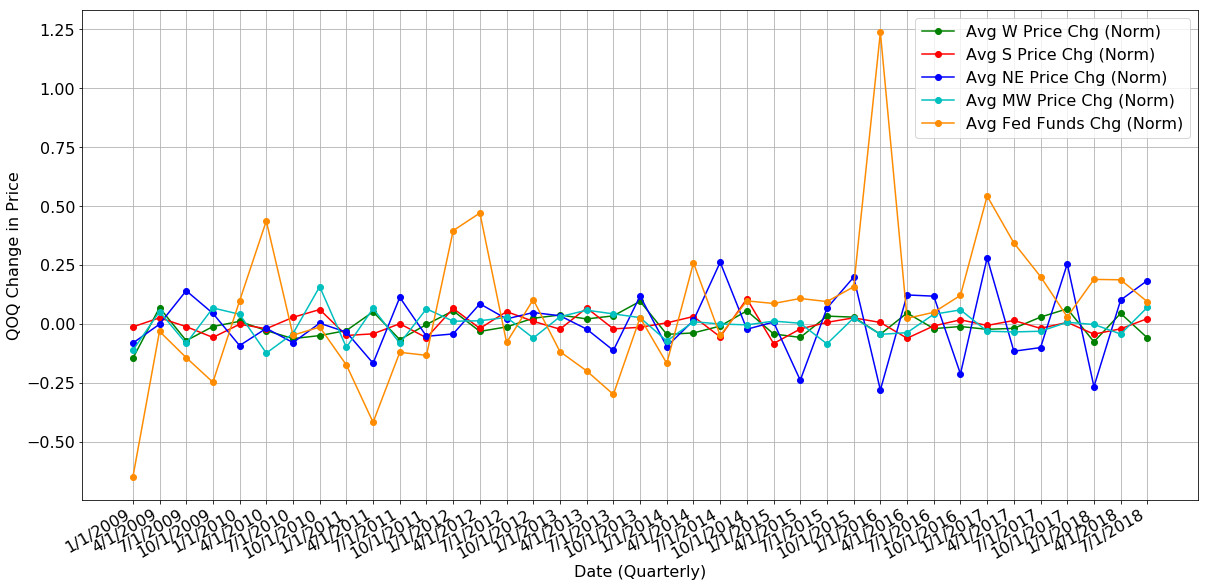

In [94]:
# plot graph of housing prices by region all years, QOQ changes against Fed Fund, 10 YR

plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig6, ax6 = plt.subplots()

ax6.set_xlabel("Date (Quarterly)")
ax6.set_ylabel("QOQ Change in Price")

data_ne3 = regional_Fed_Funds_10yr["Avg NE Price Chg (Norm)"]
data_mw3 = regional_Fed_Funds_10yr["Avg MW Price Chg (Norm)"]
data_w3 = regional_Fed_Funds_10yr["Avg W Price Chg (Norm)"]
data_s3 = regional_Fed_Funds_10yr["Avg S Price Chg (Norm)"]
data_fed3 = regional_Fed_Funds_10yr["Avg Fed Funds Chg (Norm)"]

x_axis6 = regional_Fed_Funds_10yr["Date (Quarterly)"]

west_trend3 = plt.plot(x_axis6,data_w3,color='g',marker = "o")
south_trend3 = plt.plot(x_axis6,data_s3,color='r',marker = "o")
ne_trend3 = plt.plot(x_axis6,data_ne3,color='b',marker = "o")
mw_trend3 = plt.plot(x_axis6,data_mw3,color='c',marker = "o")
fed_trend3 = plt.plot(x_axis6,data_fed3,color='darkorange',marker = "o")

plt.legend(loc="best")

ax6.grid(True)
fig6.autofmt_xdate()
plt.show

In [95]:
regional_Fed_Funds_10yr_delcol=regional_Fed_Funds_10yr.drop(columns=["Northeast","Midwest","South","West","Date","Fed Funds Rate","NE Quarterly Change","MW Quarterly Change","S Quarterly Change","W Quarterly Change","Fed Funds Quarterly Change"])
regional_Fed_Funds_10yr_delcol.head()

,Date (Quarterly),Avg NE Price Chg (Norm),Avg MW Price Chg (Norm),Avg W Price Chg (Norm),Avg S Price Chg (Norm),Avg Fed Funds Chg (Norm)
136,1/1/2009,-0.081789,-0.112783,-0.146935,-0.013089,-0.651935
137,4/1/2009,-0.001700,0.052053,0.068599,0.025290,-0.031959
138,7/1/2009,0.140306,-0.083179,-0.071374,-0.011857,-0.143407
139,10/1/2009,0.044420,0.067324,-0.011534,-0.057798,-0.247819
140,1/1/2010,-0.092342,0.040452,0.010414,-0.001926,0.097334


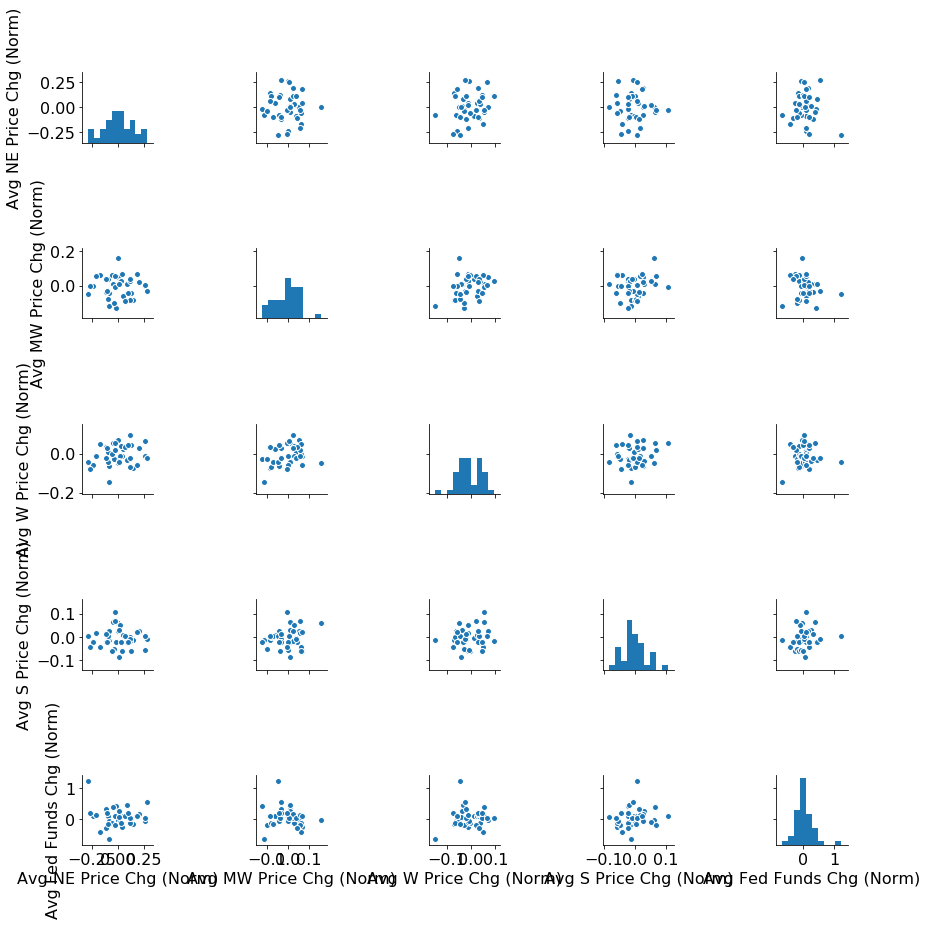

In [96]:
sns.pairplot(regional_Fed_Funds_10yr_delcol)